In [20]:
##importing Libraries

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv("/content/NIR Data_V4_noperc_for_plot.csv")
df.head()

,ContentUniformity,1110,1112,1114,1116,1118,1120,1122,1124,1126,1128,1130,1132,1134,1136,1138,1140,1142,1144,1146,1148,1150,1152,1154,1156,1158,1160,1162,1164,1166,1168,1170,1172,1174,1176,1178,1180,1182,1184,1186,...,1722,1724,1726,1728,1730,1732,1734,1736,1738,1740,1742,1744,1746,1748,1750,1752,1754,1756,1758,1760,1762,1764,1766,1768,1770,1772,1774,1776,1778,1780,1782,1784,1786,1788,1790,1792,1794,1796,1798,1800
0,100.1,2.659006,2.672815,2.694220,2.723126,2.760866,2.807864,2.862055,2.920742,2.981253,3.036830,3.087629,3.131265,3.166398,3.197083,3.225053,3.250675,3.275177,3.295606,3.312691,3.327062,3.340695,3.357744,3.380156,3.409389,3.444996,3.483318,3.522238,3.561105,3.596369,3.629168,3.660156,3.690679,3.726464,3.768926,3.818870,3.876354,3.933621,3.986120,4.027669,...,4.839038,4.806024,4.774920,4.737573,4.698571,4.662624,4.625348,4.584910,4.562636,4.537264,4.501718,4.462026,4.437594,4.411307,4.367460,4.335416,4.289590,4.282056,4.233408,4.235710,4.195461,4.169816,4.154829,4.118487,4.101122,4.095057,4.030425,4.028661,4.006373,3.988711,3.964631,3.954412,3.946111,3.911139,3.890765,3.865407,3.841028,3.903085,3.792994,3.794084
1,99.4,2.633610,2.647536,2.668880,2.697562,2.734915,2.781379,2.834928,2.892813,2.952398,3.007006,3.056853,3.099692,3.134243,3.164441,3.191953,3.217235,3.241383,3.261519,3.278479,3.292704,3.306256,3.323255,3.345500,3.374447,3.409581,3.447255,3.485452,3.523418,3.557921,3.589867,3.620058,3.650058,3.685089,3.726815,3.776105,3.832724,3.888908,3.940112,3.981189,...,4.815051,4.786598,4.733112,4.698572,4.668392,4.626639,4.605268,4.573858,4.546319,4.513479,4.469913,4.434455,4.403273,4.374036,4.336699,4.301046,4.279192,4.249538,4.224226,4.195281,4.176410,4.152728,4.106633,4.087850,4.075754,4.070809,4.011888,4.004490,3.976988,3.956921,3.950059,3.931803,3.919032,3.898129,3.881474,3.859406,3.831476,3.886848,3.784373,3.770951
2,100.7,2.692640,2.706064,2.727004,2.755307,2.792278,2.838367,2.891539,2.949106,3.008404,3.062823,3.112538,3.155178,3.189505,3.219527,3.246873,3.271984,3.295966,3.316024,3.332766,3.346776,3.360115,3.376754,3.398721,3.427305,3.462317,3.499965,3.538244,3.576388,3.610835,3.642965,3.673183,3.703098,3.738111,3.779806,3.828885,3.885635,3.941922,3.993384,4.033990,...,4.871758,4.834007,4.794460,4.761220,4.733205,4.699128,4.661964,4.623547,4.593665,4.559308,4.530856,4.482330,4.456696,4.419022,4.389550,4.363956,4.325943,4.295106,4.285052,4.252646,4.231442,4.188935,4.167522,4.153700,4.122859,4.120073,4.059996,4.047554,4.023197,4.012508,3.972120,3.959794,3.954294,3.927944,3.898880,3.903797,3.872811,3.923675,3.811084,3.817034
3,100.0,2.712384,2.727113,2.749633,2.779871,2.819207,2.868122,2.924739,2.986115,3.049603,3.107929,3.161397,3.207536,3.244820,3.277422,3.307086,3.334371,3.360511,3.382473,3.400919,3.416304,3.430761,3.448775,3.472255,3.502698,3.540101,3.580708,3.621978,3.663327,3.700763,3.735476,3.768060,3.800081,3.837236,3.881423,3.933309,3.993458,4.053665,4.108565,4.152332,...,4.950016,4.910472,4.846022,4.829983,4.797855,4.764687,4.730912,4.692926,4.666827,4.632955,4.595406,4.560094,4.532080,4.494218,4.465956,4.438041,4.396047,4.369446,4.338877,4.326460,4.302887,4.265118,4.241528,4.218702,4.197325,4.198031,4.132119,4.119234,4.111952,4.093168,4.077374,4.071253,4.080235,4.048216,4.039794,4.020414,3.997269,4.122222,3.958862,3.963222
4,99.7,2.588002,2.597217,2.612367,2.633553,2.661625,2.698152,2.741386,2.789405,2.841268,2.890166,2.935327,2.974604,3.006563,3.033907,3.058305,3.080267,3.101422,3.119017,3.133604,3.145648,3.156844,3.170602,3.188781,3.212536,3.242287,3.275069,3.308845,3.342907,3.373782,3.402214,3.428855,3.454876,3.485248,3.521466,3.564656,3.614966,3.665638,3.712346,3.750209,...,4.922612,4.884944,4.839852,4.813469,4.752826,4.738914,4.715207,4.666349,4.640165,4.603614,4.558908,4.529105,4.506724,4.484522,4.446957,4.396574,4.369641,4.350126,4.312047,4.301819,4.269893,4.237147,4.219388,4.191328,4.169955,4.146274,4.105875,4.092352,4.071337,4.052164,4.028621,4.020946,4.013075,3.974624,3.958395,3.931957,3.914

In [24]:
df.isnull().sum()

ContentUniformity    0
1110                 0
1112                 0
1114                 0
1116                 0
                    ..
1792                 0
1794                 0
1796                 0
1798                 0
1800                 0
Length: 347, dtype: int64

In [26]:
df.dtypes

ContentUniformity    float64
1110                 float64
1112                 float64
1114                 float64
1116                 float64
                      ...   
1792                 float64
1794                 float64
1796                 float64
1798                 float64
1800                 float64
Length: 347, dtype: object

In [27]:
##EXPLORE - Find Significant Patterns and Trends using Statistical Method.

In [28]:
df.describe()

,ContentUniformity,1110,1112,1114,1116,1118,1120,1122,1124,1126,1128,1130,1132,1134,1136,1138,1140,1142,1144,1146,1148,1150,1152,1154,1156,1158,1160,1162,1164,1166,1168,1170,1172,1174,1176,1178,1180,1182,1184,1186,...,1722,1724,1726,1728,1730,1732,1734,1736,1738,1740,1742,1744,1746,1748,1750,1752,1754,1756,1758,1760,1762,1764,1766,1768,1770,1772,1774,1776,1778,1780,1782,1784,1786,1788,1790,1792,1794,1796,1798,1800
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,96.581714,2.716748,2.728888,2.748103,2.774431,2.808935,2.852225,2.902620,2.957320,3.014289,3.066998,3.115301,3.157184,3.191201,3.220901,3.248015,3.272811,3.296566,3.316481,3.333046,3.346905,3.359970,3.376265,3.397759,3.425776,3.460256,3.497860,3.536190,3.574619,3.609500,3.641652,3.671879,3.701497,3.736054,3.777346,3.826058,3.882236,3.938397,3.989613,4.030294,...,4.929083,4.888836,4.851050,4.814882,4.778517,4.748307,4.713317,4.682185,4.649298,4.615915,4.583791,4.547795,4.515270,4.480678,4.446025,4.416651,4.381935,4.353161,4.325372,4.314665,4.291025,4.253710,4.228970,4.203859,4.180729,4.193959,4.123004,4.107507,4.091521,4.075966,4.058855,4.055306,4.048578,4.018976,3.997192,3.974348,3.956829,4.024427,3.907187,3.894206
std,10.555557,0.129600,0.131716,0.134894,0.139179,0.144727,0.151635,0.159752,0.168723,0.177946,0.186220,0.193577,0.199528,0.203746,0.206555,0.208440,0.209693,0.210591,0.210984,0.210989,0.210776,0.210697,0.210980,0.211590,0.212425,0.213224,0.213650,0.213749,0.213680,0.213679,0.213851,0.214253,0.214862,0.215767,0.216935,0.218476,0.220377,0.222561,0.224598,0.226269,...,0.137202,0.136493,0.136150,0.137627,0.136596,0.138345,0.138509,0.139071,0.137944,0.140463,0.139346,0.139837,0.140123,0.140251,0.139898,0.139517,0.140005,0.139633,0.139430,0.146869,0.146338,0.141905,0.141530,0.140276,0.140920,0.159805,0.134522,0.136326,0.138700,0.139600,0.140951,0.150138,0.156050,0.151680,0.150404,0.151875,0.152583,0.208405,0.147484,0.153462
min,75.800000,2.382242,2.396399,2.417094,2.444450,2.480204,2.525566,2.578469,2.636618,2.698409,2.756311,2.799203,2.833770,2.863369,2.890615,2.916393,2.940759,2.964855,2.986049,3.004361,3.020046,3.034350,3.050920,3.071760,3.098611,3.132569,3.171354,3.212312,3.254444,3.293049,3.328251,3.360557,3.391110,3.425733,3.466418,3.513982,3.569153,3.624917,3.675250,3.714061,...,4.647443,4.597050,4.560087,4.520518,4.482520,4.451172,4.418088,4.387128,4.357888,4.315870,4.284957,4.249103,4.221035,4.191500,4.159047,4.125172,4.090089,4.062996,4.036308,4.016136,3.990176,3.962498,3.937839,3.929346,3.913393,3.905562,3.865809,3.845413,3.838781,3.845514,3.829676,3.846100,3.827041,3.842474,3.824500,3.800972,3.780052,3.807402,3.742480,3.722910
25%,88.550000,2.629639,2.638282,2.656993,2.684878,2.720639,2.764861,2.813512,2.861373,2.909880,2.954254,2.998495,3.036110,3.066020,3.094345,3.120406,3.144735,3.168135,3.187887,3.204449,3.218576,3.231960,3.248712,3.270992,3.299419,3.334199,3.373146,3.411350,3.448592,3.483109,3.514625,3.544112,3.572359,3.604687,3.643712,3.690383,3.746722,3.802389,3.851911,3.890757,...,4.839175,4.801704,4.759184,4.719876,4.682517,4.654115,4.618737,4.584364,4.554365,4.519018,4.490628,4.454665,4.422904,4.385948,4.350358,

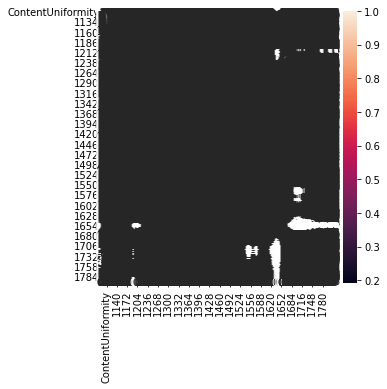

In [62]:
plt.figure(figsize=(5, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
## MODEL - Construct Model to Predict and Forecast

In [ ]:
##Split Data to Predictors and Target

In [31]:
X=df.drop("ContentUniformity",axis=1)
X.head()

,1110,1112,1114,1116,1118,1120,1122,1124,1126,1128,1130,1132,1134,1136,1138,1140,1142,1144,1146,1148,1150,1152,1154,1156,1158,1160,1162,1164,1166,1168,1170,1172,1174,1176,1178,1180,1182,1184,1186,1188,...,1722,1724,1726,1728,1730,1732,1734,1736,1738,1740,1742,1744,1746,1748,1750,1752,1754,1756,1758,1760,1762,1764,1766,1768,1770,1772,1774,1776,1778,1780,1782,1784,1786,1788,1790,1792,1794,1796,1798,1800
0,2.659006,2.672815,2.694220,2.723126,2.760866,2.807864,2.862055,2.920742,2.981253,3.036830,3.087629,3.131265,3.166398,3.197083,3.225053,3.250675,3.275177,3.295606,3.312691,3.327062,3.340695,3.357744,3.380156,3.409389,3.444996,3.483318,3.522238,3.561105,3.596369,3.629168,3.660156,3.690679,3.726464,3.768926,3.818870,3.876354,3.933621,3.986120,4.027669,4.058805,...,4.839038,4.806024,4.774920,4.737573,4.698571,4.662624,4.625348,4.584910,4.562636,4.537264,4.501718,4.462026,4.437594,4.411307,4.367460,4.335416,4.289590,4.282056,4.233408,4.235710,4.195461,4.169816,4.154829,4.118487,4.101122,4.095057,4.030425,4.028661,4.006373,3.988711,3.964631,3.954412,3.946111,3.911139,3.890765,3.865407,3.841028,3.903085,3.792994,3.794084
1,2.633610,2.647536,2.668880,2.697562,2.734915,2.781379,2.834928,2.892813,2.952398,3.007006,3.056853,3.099692,3.134243,3.164441,3.191953,3.217235,3.241383,3.261519,3.278479,3.292704,3.306256,3.323255,3.345500,3.374447,3.409581,3.447255,3.485452,3.523418,3.557921,3.589867,3.620058,3.650058,3.685089,3.726815,3.776105,3.832724,3.888908,3.940112,3.981189,4.011813,...,4.815051,4.786598,4.733112,4.698572,4.668392,4.626639,4.605268,4.573858,4.546319,4.513479,4.469913,4.434455,4.403273,4.374036,4.336699,4.301046,4.279192,4.249538,4.224226,4.195281,4.176410,4.152728,4.106633,4.087850,4.075754,4.070809,4.011888,4.004490,3.976988,3.956921,3.950059,3.931803,3.919032,3.898129,3.881474,3.859406,3.831476,3.886848,3.784373,3.770951
2,2.692640,2.706064,2.727004,2.755307,2.792278,2.838367,2.891539,2.949106,3.008404,3.062823,3.112538,3.155178,3.189505,3.219527,3.246873,3.271984,3.295966,3.316024,3.332766,3.346776,3.360115,3.376754,3.398721,3.427305,3.462317,3.499965,3.538244,3.576388,3.610835,3.642965,3.673183,3.703098,3.738111,3.779806,3.828885,3.885635,3.941922,3.993384,4.033990,4.064634,...,4.871758,4.834007,4.794460,4.761220,4.733205,4.699128,4.661964,4.623547,4.593665,4.559308,4.530856,4.482330,4.456696,4.419022,4.389550,4.363956,4.325943,4.295106,4.285052,4.252646,4.231442,4.188935,4.167522,4.153700,4.122859,4.120073,4.059996,4.047554,4.023197,4.012508,3.972120,3.959794,3.954294,3.927944,3.898880,3.903797,3.872811,3.923675,3.811084,3.817034
3,2.712384,2.727113,2.749633,2.779871,2.819207,2.868122,2.924739,2.986115,3.049603,3.107929,3.161397,3.207536,3.244820,3.277422,3.307086,3.334371,3.360511,3.382473,3.400919,3.416304,3.430761,3.448775,3.472255,3.502698,3.540101,3.580708,3.621978,3.663327,3.700763,3.735476,3.768060,3.800081,3.837236,3.881423,3.933309,3.993458,4.053665,4.108565,4.152332,4.184787,...,4.950016,4.910472,4.846022,4.829983,4.797855,4.764687,4.730912,4.692926,4.666827,4.632955,4.595406,4.560094,4.532080,4.494218,4.465956,4.438041,4.396047,4.369446,4.338877,4.326460,4.302887,4.265118,4.241528,4.218702,4.197325,4.198031,4.132119,4.119234,4.111952,4.093168,4.077374,4.071253,4.080235,4.048216,4.039794,4.020414,3.997269,4.122222,3.958862,3.963222
4,2.588002,2.597217,2.612367,2.633553,2.661625,2.698152,2.741386,2.789405,2.841268,2.890166,2.935327,2.974604,3.006563,3.033907,3.058305,3.080267,3.101422,3.119017,3.133604,3.145648,3.156844,3.170602,3.188781,3.212536,3.242287,3.275069,3.308845,3.342907,3.373782,3.402214,3.428855,3.454876,3.485248,3.521466,3.564656,3.614966,3.665638,3.712346,3.750209,3.778548,...,4.922612,4.884944,4.839852,4.813469,4.752826,4.738914,4.715207,4.666349,4.640165,4.603614,4.558908,4.529105,4.506724,4.484522,4.446957,4.396574,4.369641,4.350126,4.312047,4.301819,4.269893,4.237147,4.219388,4.191328,4.169955,4.146274,4.105875,4.092352,4.071337,4.052164,4.028621,4.020946,4.013075,3.974624,3.958395,3.931957,3

In [32]:
y=df["ContentUniformity"]
y.head()

0    100.1
1     99.4
2    100.7
3    100.0
4     99.7
Name: ContentUniformity, dtype: float64

In [33]:

n_cols = X.shape[1]
n_cols

346

In [34]:
##Importing SKLEARN and KERAS Libraries

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import keras

from keras.models import Sequential
from keras.layers import Dense

In [42]:
#Building the Model

#Network Properties:(Hidden Layer: 1,Nodes: 10,Activation Function: ReLU,Optimizer: Adam,Loss Function: Mean absolute Error,Epochs: 50)

In [43]:
mae_A = []
r2_A = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_absolute_error')

    #fit the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mae_A.append(mean_absolute_error(y_test, y_pred))
    r2_A.append(r2_score(y_test, y_pred))

In [44]:
print('mse_Mean: {:.2f}'.format(np.mean(mae_A)))
print('mse_StdDev: {:.2f}'.format(np.std(mae_A)))

mse_Mean: 7.71
mse_StdDev: 0.65


In [45]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_A)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_A)))

R^2_Mean: 0.23
R^2_StdDev: 0.10


In [46]:
#Building the Model

#Network Properties:(Hidden Layer: 1,Nodes: 10,Activation Function: ReLU,Optimizer: Adam,Loss Function: Mean absolute Error,Epochs: 50)

##Model is retrain with normalized data.

In [47]:
X_norm = (X - X.mean()) / X.std()
X_norm.head()

,1110,1112,1114,1116,1118,1120,1122,1124,1126,1128,1130,1132,1134,1136,1138,1140,1142,1144,1146,1148,1150,1152,1154,1156,1158,1160,1162,1164,1166,1168,1170,1172,1174,1176,1178,1180,1182,1184,1186,1188,...,1722,1724,1726,1728,1730,1732,1734,1736,1738,1740,1742,1744,1746,1748,1750,1752,1754,1756,1758,1760,1762,1764,1766,1768,1770,1772,1774,1776,1778,1780,1782,1784,1786,1788,1790,1792,1794,1796,1798,1800
0,-0.445540,-0.425708,-0.399448,-0.368624,-0.332133,-0.292550,-0.253926,-0.216796,-0.185651,-0.162001,-0.142951,-0.129901,-0.121736,-0.115311,-0.110163,-0.105562,-0.101567,-0.098941,-0.096475,-0.094142,-0.091481,-0.087783,-0.083196,-0.077143,-0.071568,-0.068066,-0.065274,-0.063244,-0.061453,-0.058377,-0.054717,-0.050350,-0.044445,-0.038815,-0.032901,-0.026689,-0.021459,-0.015552,-0.011600,-0.006944,...,-0.656296,-0.606716,-0.559158,-0.561732,-0.585271,-0.619341,-0.635113,-0.699462,-0.628236,-0.559941,-0.588986,-0.613348,-0.554341,-0.494624,-0.561586,-0.582254,-0.659586,-0.509232,-0.659571,-0.537588,-0.653034,-0.591196,-0.523851,-0.608598,-0.564909,-0.618891,-0.688208,-0.578361,-0.613904,-0.625035,-0.668483,-0.672010,-0.656627,-0.710955,-0.707610,-0.717309,-0.758937,-0.582240,-0.774275,-0.652421
1,-0.641497,-0.617628,-0.587300,-0.552302,-0.511442,-0.467213,-0.423734,-0.382328,-0.347806,-0.322156,-0.301937,-0.288140,-0.279555,-0.273341,-0.268962,-0.265033,-0.262039,-0.260504,-0.258625,-0.257149,-0.254934,-0.251254,-0.246985,-0.241634,-0.237661,-0.236861,-0.237373,-0.239615,-0.241386,-0.242155,-0.241870,-0.239407,-0.236202,-0.232933,-0.228643,-0.224667,-0.222361,-0.220398,-0.217019,-0.213270,...,-0.831127,-0.749038,-0.866230,-0.845114,-0.806207,-0.879451,-0.780085,-0.778932,-0.746522,-0.729274,-0.817231,-0.810513,-0.799276,-0.760369,-0.781467,-0.828603,-0.733855,-0.742115,-0.725425,-0.812859,-0.783218,-0.711615,-0.864386,-0.827002,-0.744926,-0.770626,-0.826007,-0.755664,-0.825765,-0.852758,-0.771866,-0.822599,-0.830154,-0.796727,-0.769384,-0.756821,-0.821538,-0.660150,-0.832729,-0.803163
2,-0.186018,-0.173279,-0.156413,-0.137403,-0.115090,-0.091389,-0.069365,-0.048686,-0.033071,-0.022419,-0.014273,-0.010053,-0.008325,-0.006652,-0.005481,-0.003942,-0.002849,-0.002166,-0.001327,-0.000612,0.000689,0.002320,0.004544,0.007198,0.009666,0.009851,0.009608,0.008279,0.006246,0.006140,0.006085,0.007450,0.009535,0.011339,0.012939,0.015425,0.015839,0.016791,0.016336,0.018649,...,-0.417816,-0.401701,-0.415640,-0.389912,-0.331721,-0.355480,-0.370756,-0.421640,-0.403297,-0.403003,-0.379880,-0.468150,-0.418017,-0.439615,-0.403685,-0.377692,-0.399931,-0.415772,-0.289176,-0.422274,-0.407158,-0.456465,-0.434166,-0.357572,-0.410659,-0.462350,-0.468386,-0.439774,-0.492606,-0.454569,-0.615352,-0.636163,-0.604188,-0.600162,-0.653656,-0.464535,-0.550638,-0.483442,-0.651618,-0.502873
3,-0.033672,-0.013473,0.011340,0.039089,0.070977,0.104839,0.138458,0.170662,0.198454,0.219799,0.238128,0.252357,0.263164,0.273637,0.283393,0.293573,0.303645,0.312783,0.321689,0.329255,0.335987,0.343684,0.352075,0.362114,0.374464,0.387773,0.401348,0.415144,0.427101,0.438736,0.448912,0.458824,0.468942,0.479761,0.490904,0.504691,0.517916,0.529623,0.539350,0.546201,...,0.152571,0.158513,-0.036927,0.109721,0.141572,0.118399,0.127030,0.077233,0.127076,0.121313,0.083357,0.087954,0.119969,0.096539,0.142470,0.153317,0.100794,0.116625,0.096861,0.080308,0.081059,0.080393,0.088734,0.105813,0.117768,0.025484,0.067756,0.086025,0.147302,0.123226,0.131388,0.106215,0.202865,0.192771,0.283250,0.303312,0.265034,0.469257,0.350375,0.449729
4,-0.993411,-0.999654,-1.006243,-1.012207,-1.017842,-1.016077,-1.009281,-0.995215,-0.972320,-0.949584,-0.929728,-0.915061,-0.906218,-0.905300,-0.910142,-0.918215,-0.926648,-0.935921,-0.945272,-0.954838,-0.964068,-0.974796,-0.987659,-1.003839,-1.022252,-1.042786,-1.063609,-1.084387,-1.103141,-1.119650,-1.134287,-1.147815,-1.162390,-1.179527,-1.196478,-1.212782,-1.225545,-1.234505,-1.237838,-1.237459,...,-0.047164,-0.028516,-0.082244,-0.010270,-0.188078,-0.067895,0.

In [48]:
mae_B = []
r2_B = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_absolute_error')

    #fit the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mae_B.append(mean_absolute_error(y_test, y_pred))
    r2_B.append(r2_score(y_test, y_pred))

In [49]:
print('mae_Mean: {:.2f}'.format(np.mean(mae_B)))
print('mae_StdDev: {:.2f}'.format(np.std(mae_B)))

mae_Mean: 58.73
mae_StdDev: 13.72


In [50]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_B)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_B)))

R^2_Mean: -42.52
R^2_StdDev: 16.84


In [51]:
#Building the Model

#Network Properties:(Hidden Layer: 1,Nodes: 10,Activation Function: ReLU,Optimizer: Adam,Loss Function: Mean absolute Error,Epochs: 100)

##Model is retrain with 100 epochs.

In [52]:

mae_C = []
r2_C = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_absolute_error')

    #fit the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mae_C.append(mean_absolute_error(y_test, y_pred))
    r2_C.append(r2_score(y_test, y_pred))

In [53]:
print('mae_Mean: {:.2f}'.format(np.mean(mae_C)))
print('mae_StdDev: {:.2f}'.format(np.std(mae_C)))

mae_Mean: 46.68
mae_StdDev: 7.82


In [54]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_C)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_C)))

R^2_Mean: -29.16
R^2_StdDev: 8.04


In [55]:
#Building the Model

#Network Properties:(Hidden Layer: 3,Nodes: 10,Activation Function: ReLU,Optimizer: Adam,Loss Function: Mean absolute Error,Epochs: 100)

##Model is retrain with 3 hidden layers.

In [56]:
mae_D = []
r2_D = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_absolute_error')

    #fit the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mae_D.append(mean_absolute_error(y_test, y_pred))
    r2_D.append(r2_score(y_test, y_pred))


In [57]:
print('mae_Mean: {:.2f}'.format(np.mean(mae_D)))
print('mae_StdDev: {:.2f}'.format(np.std(mae_D)))

mae_Mean: 37.36
mae_StdDev: 5.36


In [58]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_D)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_D)))

R^2_Mean: -19.35
R^2_StdDev: 6.20


In [59]:
from IPython.display import HTML, display
import tabulate

tabletest = [['STEPS','MAE: Mean','MAE: StdDev','R^2: Mean','R^2: StdDev'],
         ['A', round(np.mean(mae_A),2), round(np.std(mae_A),2), round(np.mean(r2_A),2), round(np.std(r2_A),2)],
         ['B', round(np.mean(mae_B),2), round(np.std(mae_B),2), round(np.mean(r2_B),2), round(np.std(r2_B),2)],
         ['C', round(np.mean(mae_C),2), round(np.std(mae_C),2), round(np.mean(r2_D),2), round(np.std(r2_C),2)],
         ['D', round(np.mean(mae_D),2), round(np.std(mae_D),2), round(np.mean(r2_D),2), round(np.std(r2_D),2)]]

display(HTML(tabulate.tabulate(tabletest, tablefmt='html')))

STEPS,MAE: Mean,MAE: StdDev,R^2: Mean,R^2: StdDev
A,7.71,0.65,0.23,0.1
B,58.73,13.72,-42.52,16.84
C,46.68,7.82,-19.35,8.04
D,37.36,5.36,-19.35,6.2


In [67]:

#From the results above, we can clearly see that by applying:

#Data Normalization,
#Increasing Epochs,
#and Increasing Hidden Layers
#the mean of MSE has gone down, while the mean of R^2 has gone up indicating that the model accuracy is getting better.##